## Imports section

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data preparation

In [2]:
# Read the data
survey_df = pd.read_csv('../data/survey.csv')

In [3]:
# Extract the comment column
commments = survey_df['Additional Comments']

In [4]:
# Drop the unnecessary columns
survey_df.drop(['Timestamp', 'Additional Comments'], axis=1, inplace=True)

In [5]:
# Visualization of column names
survey_df.columns

Index(['How frequently do you utilize Valencia's bus service?',
       'How would you rate the punctuality of buses in Valencia?',
       'How would you rate the accessibility of bus stops in Valencia?',
       'How would you rate the frequency of bus services in Valencia?',
       'How would you rate the average travel time between different locations in Valencia when using the city's bus services?',
       'How would you rate the availability of night transport in Valencia?',
       'How would you rate the information provided by EMT to its users (application, information at the bus stops)?',
       'What is your current residential neighborhood?',
       'How would you rate the quality of bus connection between this crucial points in Valencia? [Ciudad de las Artes y las Ciencias <--> Beach]',
       'How would you rate the quality of bus connection between this crucial points in Valencia? [Ciudad de las Artes y las Ciencias <--> Old Town]',
       'How would you rate the quality of 

In [6]:
# Renaming the columns for the better understanding
survey_df.rename(columns={
    'How frequently do you utilize Valencia\'s bus service?': 'frequency_of_use',
    'How would you rate the punctuality of buses in Valencia?': 'bus_punctuality',
    'How would you rate the accessibility of bus stops in Valencia?': 'bus_stop_accessibility',
    'How would you rate the frequency of bus services in Valencia?': 'bus_frequency',
    'How would you rate the average travel time between different locations in Valencia when using the city\'s bus services?': 'bus_travel_time',
    'How would you rate the availability of night transport in Valencia?': 'night_transport',
    'How would you rate the information provided by EMT to its users (application, information at the bus stops)?': 'information_provided',
    'What is your current residential neighborhood?': 'residential_neighborhood',
    'How would you rate the quality of bus connection between this crucial points in Valencia? [Ciudad de las Artes y las Ciencias <--> Beach]': 'bus_quality_CiudadArtes_Beach',
    'How would you rate the quality of bus connection between this crucial points in Valencia? [Ciudad de las Artes y las Ciencias <--> Old Town]': 'bus_quality_CiudadArtes_OldTown',
    'How would you rate the quality of bus connection between this crucial points in Valencia? [Ciudad de las Artes y las Ciencias <--> Location of your stay]': 'bus_quality_CiudadArtes_Stay',
    'How would you rate the quality of bus connection between this crucial points in Valencia? [Beach <--> Old Town]': 'bus_quality_Beach_OldTown',
    'How would you rate the quality of bus connection between this crucial points in Valencia? [Beach <--> Location of your stay]': 'bus_quality_Beach_Stay',
    'How would you rate the quality of bus connection between this crucial points in Valencia? [Old Town  <--> Location of your stay]' : 'bus_quality_OldTown_Stay'
}, inplace=True)

In [7]:
# Dividing the dataframe into two parts
first_part_df = survey_df.iloc[:, :7]
second_part_df = survey_df.iloc[:, 7:]

In [8]:
# Assignment of numeric value for the frequency of use column
# Assigning 0 to 'Never' and 4 to 'Daily'
first_part_df['frequency_of_use'] = first_part_df['frequency_of_use'].map({
    'Occasionally': 0,
    'Once in a month': 1,
    '2-4 times a month': 2,
    '2-4 times a week': 3,
    'On a daily basis': 4
})

In [9]:
# Creating the residential_neighborhood_df that is about the connections to the residential neighborhood
neighborhood_df = second_part_df[['residential_neighborhood', 'bus_quality_CiudadArtes_Stay', 'bus_quality_Beach_Stay', 'bus_quality_OldTown_Stay']]
second_part_df.drop(['residential_neighborhood', 'bus_quality_Beach_Stay', 'bus_quality_CiudadArtes_Stay', 'bus_quality_OldTown_Stay'], axis=1, inplace=True)

In [10]:
# Convert "I don't know / Not applicable" to NaN
second_part_df.replace("I don't know / Not applicable", np.nan, inplace=True)
neighborhood_df.replace("I don't know / Not applicable", np.nan, inplace=True)

# Convert all data to numeric format
second_part_df = second_part_df.apply(pd.to_numeric)

In [11]:
# Average of transport marks in areas to CiudadArtes, Beach and OldTown
areas = neighborhood_df['residential_neighborhood'].unique()

# I want to create a dataframe that has column name of the area number of responses averages and medians
area_df = pd.DataFrame(columns=['area', 'num_of_responses', 'CityArtsScienceMean', 'CityArtsScienceMedian', 'BeachMean', 'BeachMedian', 'OldTownMean', 'OldTownMedian'])

neighborhood_df[['bus_quality_CiudadArtes_Stay', 'bus_quality_Beach_Stay', 'bus_quality_OldTown_Stay']] = neighborhood_df[['bus_quality_CiudadArtes_Stay', 'bus_quality_Beach_Stay', 'bus_quality_OldTown_Stay']].apply(pd.to_numeric, errors='coerce')

new_row = {
    'area': 'Total',
    'num_of_responses': neighborhood_df.shape[0],
    'CityArtsScienceMean': round(neighborhood_df['bus_quality_CiudadArtes_Stay'].mean(), 2),
    'CityArtsScienceMedian': neighborhood_df['bus_quality_CiudadArtes_Stay'].median(),
    'BeachMean': round(neighborhood_df['bus_quality_Beach_Stay'].mean(), 2),
    'BeachMedian': neighborhood_df['bus_quality_Beach_Stay'].median(),
    'OldTownMean': round(neighborhood_df['bus_quality_OldTown_Stay'].mean(), 2),
    'OldTownMedian': neighborhood_df['bus_quality_OldTown_Stay'].median()
}

area_df = pd.concat([area_df, pd.DataFrame(new_row, index=[0])], ignore_index=True)

for area in areas:
    survey_from_area = neighborhood_df[neighborhood_df['residential_neighborhood'] == area]

    if survey_from_area.shape[0] < 5:
        continue

    new_row = {
        'area': area.split('-')[0][:-1],
        'num_of_responses': survey_from_area.shape[0],
        'CityArtsScienceMean': round(survey_from_area['bus_quality_CiudadArtes_Stay'].mean(), 2),
        'CityArtsScienceMedian': survey_from_area['bus_quality_CiudadArtes_Stay'].median(),
        'BeachMean': round(survey_from_area['bus_quality_Beach_Stay'].mean(), 2),
        'BeachMedian': survey_from_area['bus_quality_Beach_Stay'].median(),
        'OldTownMean': round(survey_from_area['bus_quality_OldTown_Stay'].mean(), 2),
        'OldTownMedian': survey_from_area['bus_quality_OldTown_Stay'].median()
    }

    area_df = pd.concat([area_df, pd.DataFrame(new_row, index=[0])], ignore_index=True)

In [12]:
area_df

,area,num_of_responses,CityArtsScienceMean,CityArtsScienceMedian,BeachMean,BeachMedian,OldTownMean,OldTownMedian
0,Total,104,2.99,3.0,3.90,4.0,3.63,4.0
1,Poblados Marítimos,16,3.73,4.0,4.67,5.0,3.33,3.0
2,Algirós,26,2.80,3.0,4.17,4.0,3.77,4.0
3,Camins al Grau,17,3.12,3.0,4.12,4.5,3.87,4.0
4,Benimaclet,15,2.62,2.0,4.00,4.0,3.50,3.5
5,Eixample,5,3.75,3.5,3.00,3.0,3.50,3.5
6,El Pla del Real,8,2.25,2.0,3.62,3.0,4.00,4.0
7,Ciutat Vella,5,2.80,3.0,2.80,3.0,3.00,3.0


In [13]:
area_df.to_csv('../data/areas.csv', index=False)

## Basic statistic values for the columns

In [14]:
#Dataframe with the basic statistics is created (mean, median, mode)
statistics_df = pd.DataFrame(index=first_part_df.columns, columns=['mean', 'median', 'mode'])

for column in first_part_df.columns:
    statistics_df.loc[column] = [first_part_df[column].mean(), first_part_df[column].median(), first_part_df[column].mode().values[0]]

In [15]:
# Statistics are displayed
statistics_df[:]

,mean,median,mode
frequency_of_use,2.923077,3.0,3
bus_punctuality,3.067308,3.0,2
bus_stop_accessibility,4.153846,4.0,4
bus_frequency,2.913462,3.0,3
bus_travel_time,3.019231,3.0,3
night_transport,1.817308,2.0,1
information_provided,2.548077,2.0,2


## Visualizations

In [16]:
stay_connections = ['bus_quality_CiudadArtes_Stay', 'bus_quality_Beach_Stay', 'bus_quality_OldTown_Stay']
key_connections = ['bus_quality_CiudadArtes_Beach', 'bus_quality_CiudadArtes_OldTown', 'bus_quality_Beach_OldTown']

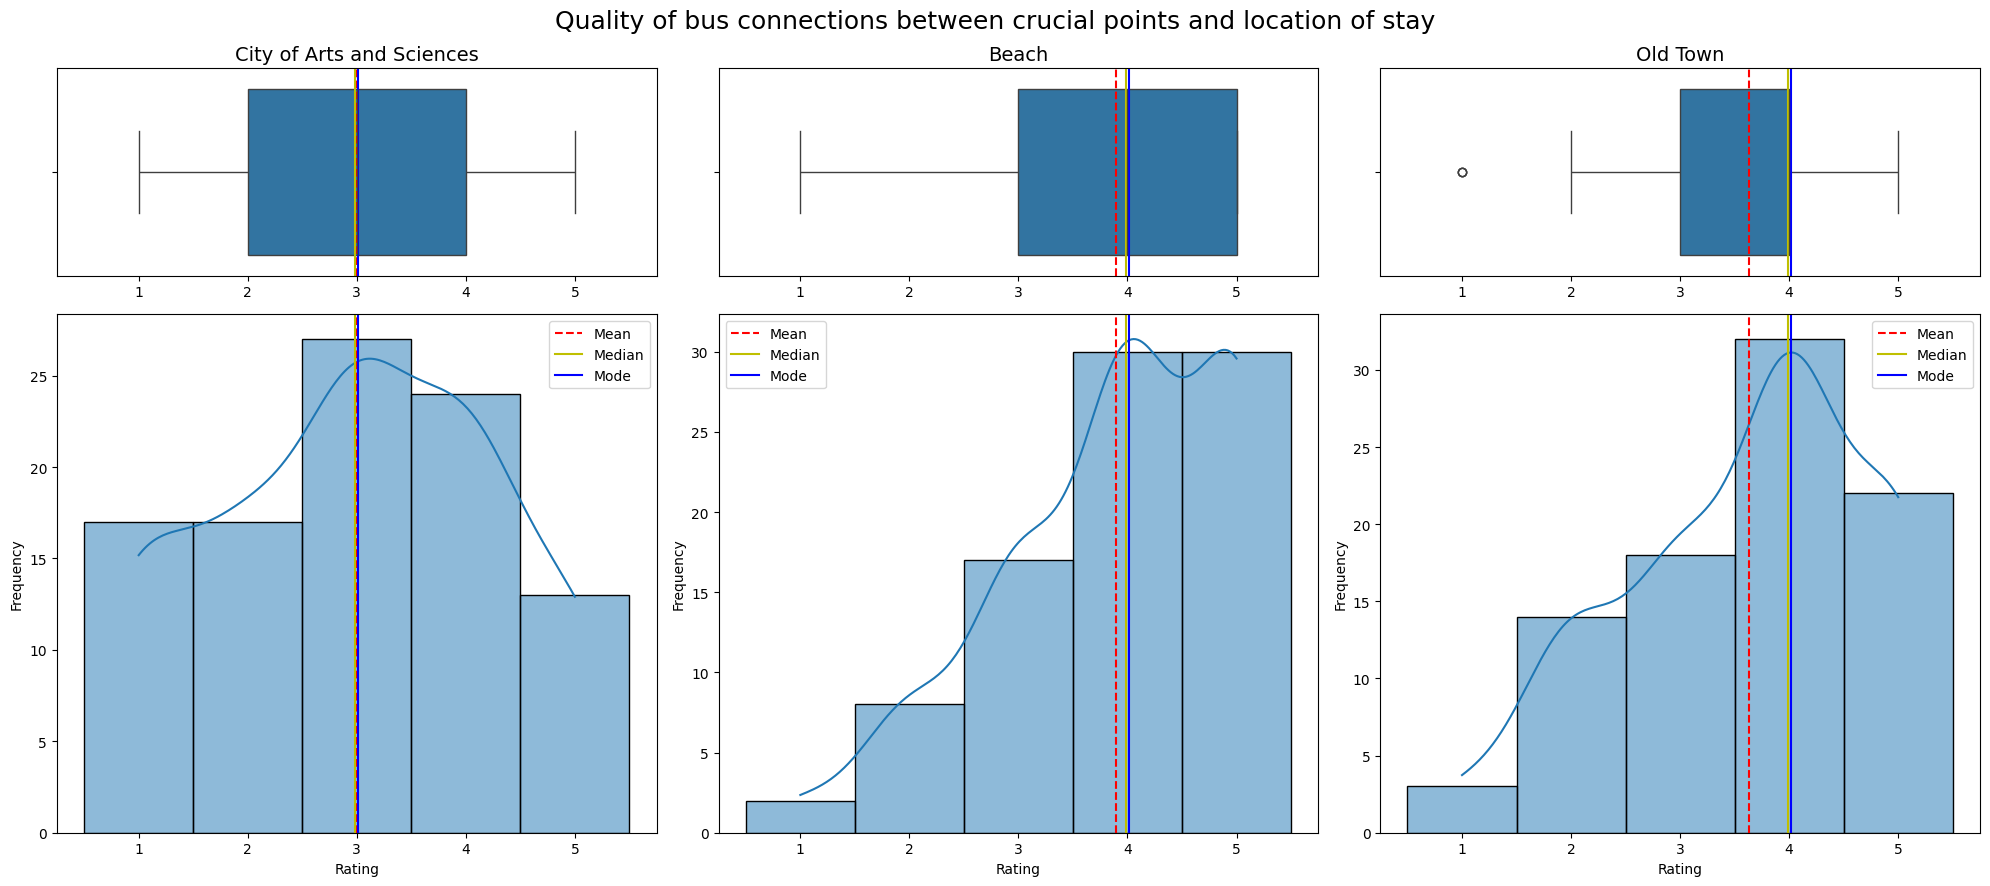

In [17]:
# Create a figure that shows the quality of bus connections between crucial points and location of stay
fig, axs = plt.subplots(2, 3, figsize=(20, 9), gridspec_kw={"height_ratios": [2, 5]})
plt.suptitle('Quality of bus connections between crucial points and location of stay', fontsize=18)

# Iterate over each route (landmark <--> location of stay) and plot the boxplot and histogram
for idx, name in enumerate(stay_connections):
    copy_df = neighborhood_df[[name]].copy()
    cleaned_data = copy_df.dropna()
    cleaned_data.loc[:, name] = cleaned_data.loc[:, name].astype(int)

    mean = cleaned_data[name].mean()
    median = cleaned_data[name].median() - 0.015
    mode = cleaned_data[name].mode().values[0] + 0.015

    ax_box = sns.boxplot(data=cleaned_data, x=name, ax=axs[0, idx])
    axs[0, idx].axvline(mean, color='r', linestyle='--')
    axs[0, idx].axvline(median, color='y', linestyle='-')
    axs[0, idx].axvline(mode, color='b', linestyle='-')
    ax_box.set_xlabel('')
    if idx == 0:
        ax_box.set_title("City of Arts and Sciences", fontsize=14)
    elif idx == 1:
        ax_box.set_title("Beach", fontsize=14)
    else:
        ax_box.set_title("Old Town", fontsize=14)

    ax_box.set_xlim(0.25, 5.75)


    ax_hist = sns.histplot(data=cleaned_data, bins=range(1, 7), kde=True, ax=axs[1, idx])

    for rect in ax_hist.patches:
        rect.set_x(rect.get_x() - 0.5)

    ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
    ax_hist.axvline(median, color='y', linestyle='-', label="Median")
    ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")

    ax_hist.set_xlabel("Rating")
    ax_hist.set_ylabel("Frequency")

    ax_hist.set_xlim(0.25, 5.75)

    ax_hist.legend()

plt.tight_layout()

# Show the plot
plt.savefig('../figures/quality_of_bus_connections_neighbourhoods.png')
plt.show()


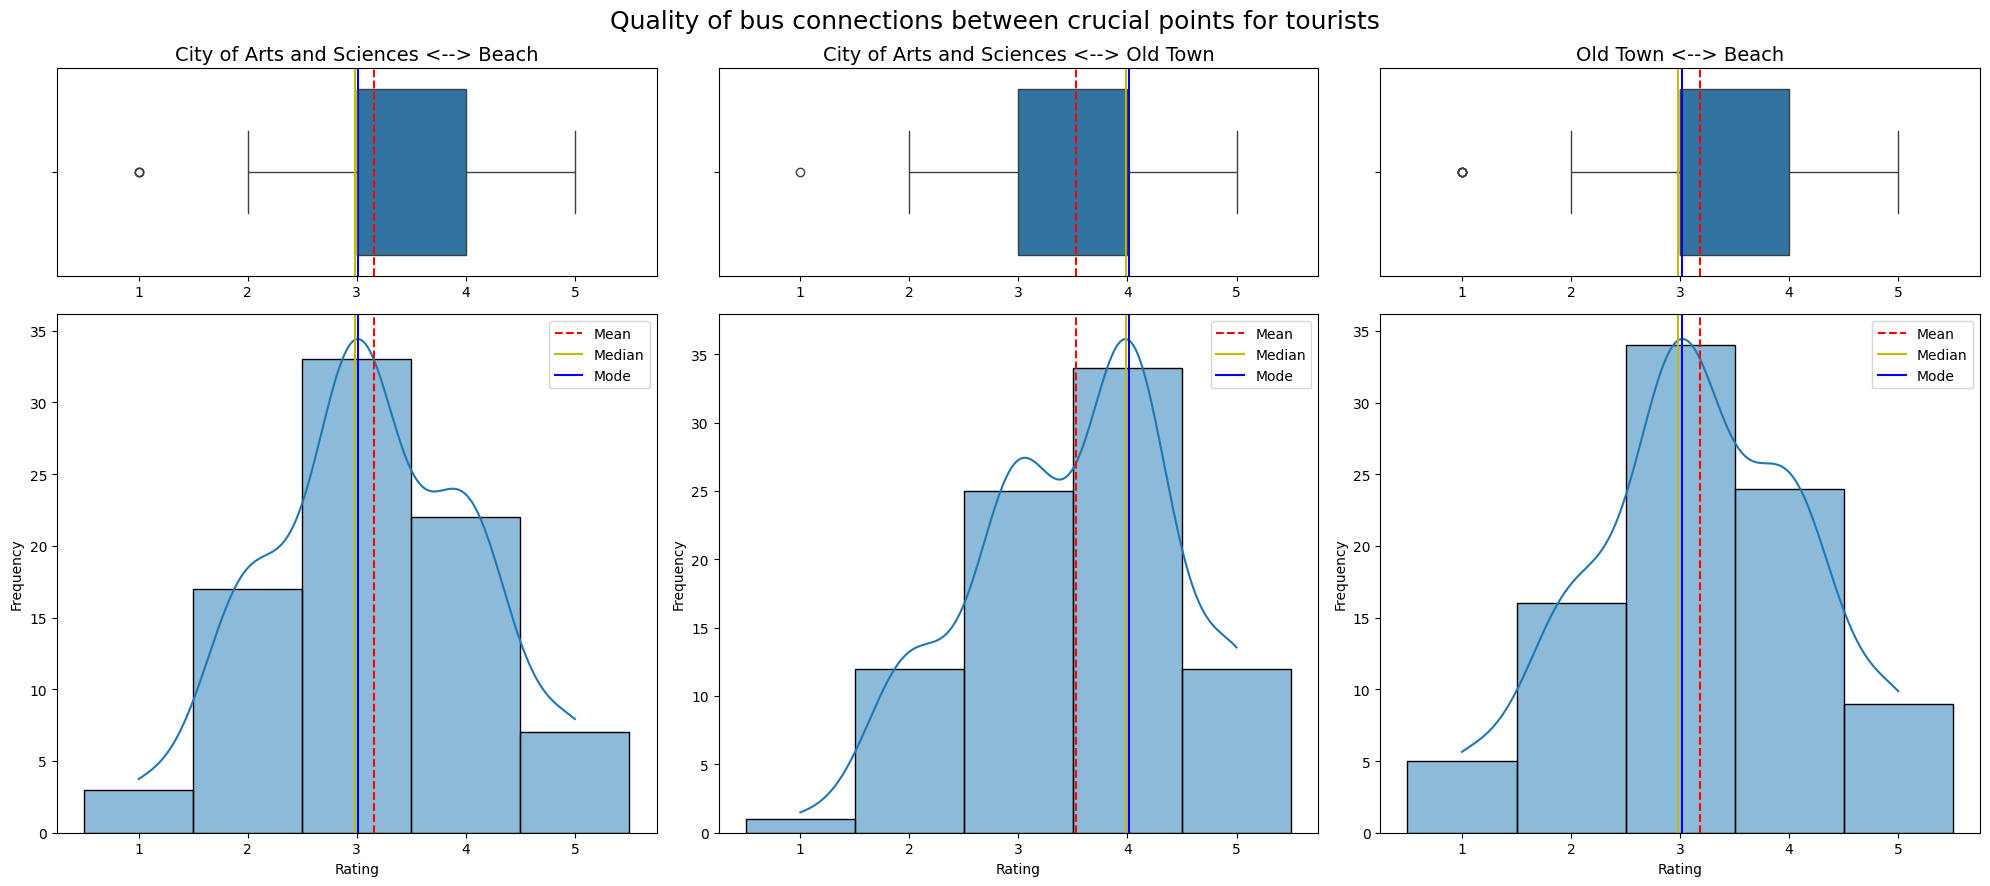

In [18]:
# Create a plot that shows the quality of bus connections between crucial points for tourists in Valencia
fig, axs = plt.subplots(2, 3, figsize=(20, 9), gridspec_kw={"height_ratios": [2, 5]})
plt.suptitle('Quality of bus connections between crucial points for tourists', fontsize=18)

# Iterate over each route (landmark <--> landmark) and plot the boxplot and histogram
for idx, name in enumerate(key_connections):
    copy_df = second_part_df[[name]].copy()
    cleaned_data = copy_df.dropna()
    cleaned_data.loc[:, name] = cleaned_data.loc[:, name].astype(int)

    mean = cleaned_data[name].mean()
    median = cleaned_data[name].median() - 0.015
    mode = cleaned_data[name].mode().values[0] + 0.015

    ax_box = sns.boxplot(data=cleaned_data, x=name, ax=axs[0, idx])
    axs[0, idx].axvline(mean, color='r', linestyle='--')
    axs[0, idx].axvline(median, color='y', linestyle='-')
    axs[0, idx].axvline(mode, color='b', linestyle='-')
    ax_box.set_xlabel('')
    if idx == 0:
        ax_box.set_title("City of Arts and Sciences <--> Beach", fontsize=14)
    elif idx == 1:
        ax_box.set_title("City of Arts and Sciences <--> Old Town", fontsize=14)
    else:
        ax_box.set_title("Old Town <--> Beach", fontsize=14)

    ax_box.set_xlim(0.25, 5.75)


    ax_hist = sns.histplot(data=cleaned_data, bins=range(1, 7), kde=True, ax=axs[1, idx])

    for rect in ax_hist.patches:
        rect.set_x(rect.get_x() - 0.5)

    ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
    ax_hist.axvline(median, color='y', linestyle='-', label="Median")
    ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")

    ax_hist.set_xlabel("Rating")
    ax_hist.set_ylabel("Frequency")

    ax_hist.set_xlim(0.25, 5.75)

    ax_hist.legend()

plt.tight_layout()

# Show the plot
plt.savefig('../figures/quality_of_bus_connections.png')
plt.show()